# NasUnet implementation by Umais Khan

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train=datasets.MNIST(root="./data",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST(root="./data",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 91874745.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11991258.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24507838.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23665253.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
trainset=torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [4]:
for data in trainset:
  print(data)
  break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y=data[0][1],[1][0]
print(y)


1


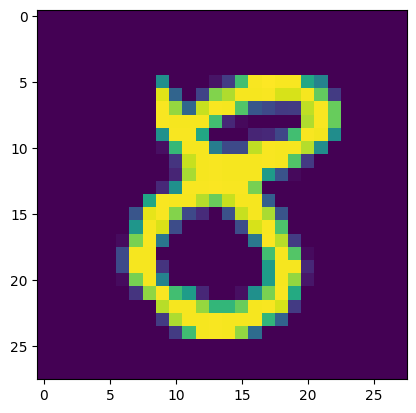

torch.Size([1, 28, 28])


In [6]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()
print(data[0][0].shape)

In [7]:
# for checking the balance of your dataset
total=0
counter_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,}
for data in trainset:
  Xs,Ys=data
  for y in Ys:
    counter_dict[int(y)]+=1
    total+=1

print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [8]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")


0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [9]:
import torch.nn as nn
import torch.nn.functional as F


In [13]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28, 64)    # 28*28 dimension of input image, output=64
    self.fc2=nn.Linear(64, 64)    # 64 is the hidden layer
    self.fc3=nn.Linear(64, 64)
    self.fc4=nn.Linear(64, 10)   # 10 classes from 0-9

  def forward(self,x):
    x=F.relu(self.fc1(x))     #activation fn relu per neuron also possible
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return F.log_softmax(x, dim=1)  #dim=1, similar to axis distributing across output layers


net=Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
X=torch.rand(28,28)
X=X.view(-1,28*28) #-1 specifies input of unknow shape
output=net(X)
print(output)


tensor([[-2.2774, -2.2180, -2.3386, -2.2648, -2.1959, -2.3864, -2.4664, -2.2795,
         -2.3766, -2.2538]], grad_fn=<LogSoftmaxBackward0>)


In [22]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(), lr=0.001)
# learning rate_ dictates the size of the step to get best result
EPOCHS=3 # full passes over our data

for epoch in range(EPOCHS):
  for data in trainset:
    X,y=data

    net.zero_grad()
    # batches it decreses training time, it also generalizes
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()

print(loss)





tensor(0.1073, grad_fn=<NllLossBackward0>)


In [23]:
correct=0
total=0

with torch.no_grad():
  for data in trainset:
    X,y=data
    output=net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
        total +=1

print("Accuracy", round(correct/total,3))


Accuracy 1.0


In [24]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

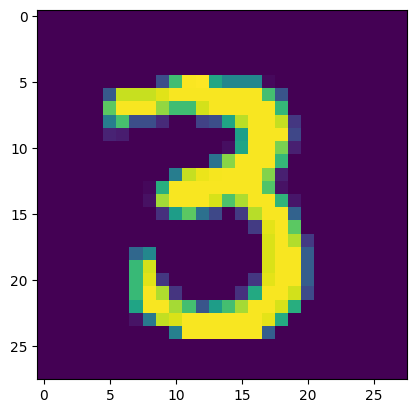

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [30]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(3)
